# Assignment #2 - Classification

<font color="red"> <b> Due: Mar 5 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Ruhani Faiheem Rahman </font>

# I. Introduction

The objective for this assignment is to get familiar with the classication problems in machine learning. We will implement perceptron algorithm, quadrative discriminant analysis, linear discriminant analysis and linear regression. Then apply these models to google play store data and predict the status of an app.

# II. Data

## Descryption

We are using Google Play Store Apps data for our classification part. This data contains some information of an app like its Catagory, Rating, Paid or Free, Prices, Total Installs, Genre, Last Updated, Size , Reviews etc. Using this features we can tell the Type of an app that it is Paid or Free. 

This data is created from scraping the google play store website. We collect this from https://www.kaggle.com/lava18/google-play-store-apps. 


## Reading and preprocessing of the data

In [221]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
#import pdb; pdb.set_trace()
%matplotlib inline
import seaborn as sns


In [222]:
df = pd.read_csv('googleplaystore.csv')
#df = df.sample(n=10000)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [224]:
df.shape

(10841, 13)

In [225]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [226]:
np.any(df.isnull())

True

In [227]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [228]:

def convertToInt(df, column_name):
    labels = df.loc[:,column_name].unique().tolist()
    maps = dict(zip(labels,range(len(labels))))
    df[column_name] = df[column_name].apply(lambda x: maps[x])
    return maps;

def fillNullToZero(df, column_name):
    df[column_name].fillna(value=0.0, inplace=True)
    
def convertToInt_(df, column_name):
    labels = df.loc[:,column_name].unique().tolist()
    maps = dict(zip(labels,labels))
    df[column_name] = df[column_name].apply(lambda x: maps[x])
    return maps;

In [215]:
a = [1.0,2.0,3.0,4.0,5.0]
b = dict(zip(a,a))
b

{1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0}

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [230]:
for column in df.columns.values:
    fillNullToZero(df,column)
print(df.info())
print(np.any(df.isnull()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
False


In [231]:
df.columns.values

array(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], dtype=object)

In [33]:
# App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver
#these features need to convert in integer.


if df.dtypes['App'] == 'object':
    app_maps = convertToInt(df,'App')

if df.dtypes['Category'] == 'object':
    category_maps = convertToInt(df,'Category')
    
if df.dtypes['Reviews'] == 'object':
    reviews_maps = convertToInt(df,'Reviews')

if df.dtypes['Size'] == 'object':
    size_maps = convertToInt(df,'Size')

if df.dtypes['Installs'] == 'object':
    installs_maps = convertToInt(df,'Installs')

if df.dtypes['Type'] == 'object':
    type_maps = convertToInt(df,'Type')

if df.dtypes['Type'] == 'object':
    type_maps = convertToInt(df,'Type')

    
if df.dtypes['Android Ver'] == 'object':
    android_version_maps = convertToInt(df,'Android Ver')


In [36]:
category_maps

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FINANCE': 11,
 'FOOD_AND_DRINK': 12,
 'HEALTH_AND_FITNESS': 13,
 'HOUSE_AND_HOME': 14,
 'LIBRARIES_AND_DEMO': 15,
 'LIFESTYLE': 16,
 'GAME': 17,
 'FAMILY': 18,
 'MEDICAL': 19,
 'SOCIAL': 20,
 'SHOPPING': 21,
 'PHOTOGRAPHY': 22,
 'SPORTS': 23,
 'TRAVEL_AND_LOCAL': 24,
 'TOOLS': 25,
 'PERSONALIZATION': 26,
 'PRODUCTIVITY': 27,
 'PARENTING': 28,
 'WEATHER': 29,
 'VIDEO_PLAYERS': 30,
 'NEWS_AND_MAGAZINES': 31,
 'MAPS_AND_NAVIGATION': 32,
 '1.9': 33}

In [38]:
type_maps

{'Free': 0, 'Paid': 1, nan: 2, '0': 3}

In [56]:
price_maps

{'0': 0,
 '$4.99': 1,
 '$3.99': 2,
 '$6.99': 3,
 '$1.49': 4,
 '$2.99': 5,
 '$7.99': 6,
 '$5.99': 7,
 '$3.49': 8,
 '$1.99': 9,
 '$9.99': 10,
 '$7.49': 11,
 '$0.99': 12,
 '$9.00': 13,
 '$5.49': 14,
 '$10.00': 15,
 '$24.99': 16,
 '$11.99': 17,
 '$79.99': 18,
 '$16.99': 19,
 '$14.99': 20,
 '$1.00': 21,
 '$29.99': 22,
 '$12.99': 23,
 '$2.49': 24,
 '$10.99': 25,
 '$1.50': 26,
 '$19.99': 27,
 '$15.99': 28,
 '$33.99': 29,
 '$74.99': 30,
 '$39.99': 31,
 '$3.95': 32,
 '$4.49': 33,
 '$1.70': 34,
 '$8.99': 35,
 '$2.00': 36,
 '$3.88': 37,
 '$25.99': 38,
 '$399.99': 39,
 '$17.99': 40,
 '$400.00': 41,
 '$3.02': 42,
 '$1.76': 43,
 '$4.84': 44,
 '$4.77': 45,
 '$1.61': 46,
 '$2.50': 47,
 '$1.59': 48,
 '$6.49': 49,
 '$1.29': 50,
 '$5.00': 51,
 '$13.99': 52,
 '$299.99': 53,
 '$379.99': 54,
 '$37.99': 55,
 '$18.99': 56,
 '$389.99': 57,
 '$19.90': 58,
 '$8.49': 59,
 '$1.75': 60,
 '$14.00': 61,
 '$4.85': 62,
 '$46.99': 63,
 '$109.99': 64,
 '$154.99': 65,
 '$3.08': 66,
 '$2.59': 67,
 '$4.80': 68,
 '$1.96': 69

In [232]:
def stringToIntConvert(df, column_name):
    print('Hello')
    i = 0
#    print(df.loc[:,'Price'].unique().tolist())
    for value in df[column_name]:

        new_val = 0.0
        if type(value) is not float:
            if value.startswith('$'):
    #            print(value)
                new_val = float(value[1:])
                print(new_val)
            elif value == "0":
                new_val = 0.00
            else :
                new_val = 0.00
        df.replace({column_name : value},new_val,inplace=True)
        i+=1
        

def printHello():
    print('Hello')
    print(df.loc[:,'Price'].unique().tolist())

In [233]:
stringToIntConvert(df,'Price')

Hello
4.99
4.99
4.99
4.99
3.99
3.99
6.99
1.49
2.99
3.99
7.99
3.99
3.99
5.99
3.99
3.99
4.99
2.99
3.49
4.99
2.99
3.99
2.99
2.99
2.99
1.99
4.99
4.99
4.99
5.99
6.99
9.99
4.99
3.99
2.99
3.99
2.99
3.99
3.99
4.99
3.99
2.99
7.49
2.99
0.99
0.99
0.99
4.99
2.99
4.99
2.99
4.99
4.99
2.99
2.99
3.99
3.99
2.99
2.99
3.99
3.99
6.99
2.99
9.0
0.99
5.49
9.99
6.99
10.0
3.99
5.99
24.99
11.99
79.99
11.99
2.99
16.99
3.99
2.99
9.99
3.99
14.99
2.99
3.99
2.99
1.0
29.99
2.99
2.99
12.99
4.99
2.99
14.99
5.99
3.49
0.99
2.49
24.99
10.99
1.99
24.99
4.99
3.99
2.99
7.49
1.5
2.99
3.99
1.99
9.99
3.99
3.99
3.99
7.99
14.99
9.99
3.99
19.99
29.99
15.99
0.99
33.99
0.99
79.99
9.0
24.99
9.99
10.0
16.99
11.99
29.99
14.99
74.99
11.99
6.99
5.49
14.99
9.99
33.99
29.99
24.99
12.99
39.99
5.99
2.99
24.99
19.99
2.99
0.99
5.99
0.99
5.99
2.99
5.99
3.95
5.99
29.99
2.49
0.99
0.99
9.99
4.49
5.99
4.49
1.99
1.49
1.99
3.99
1.7
0.99
1.99
0.99
2.99
2.99
0.99
0.99
0.99
2.99
8.99
4.99
2.99
4.99
5.99
39.99
2.49
2.0
1.49
4.99
1.7
1.49
2.99
3.88
0.99
1

In [248]:
#df.Price.replace('$4.99',4.99,inplace =True)
df.loc[:,'Price'].unique().tolist()

[0.0,
 4.99,
 3.99,
 6.99,
 1.49,
 2.99,
 7.99,
 5.99,
 3.49,
 1.99,
 9.99,
 7.49,
 0.99,
 9.0,
 5.49,
 10.0,
 24.99,
 11.99,
 79.99,
 16.99,
 14.99,
 1.0,
 29.99,
 12.99,
 2.49,
 10.99,
 1.5,
 19.99,
 15.99,
 33.99,
 74.99,
 39.99,
 3.95,
 4.49,
 1.7,
 8.99,
 2.0,
 3.88,
 25.99,
 399.99,
 17.99,
 400.0,
 3.02,
 1.76,
 4.84,
 4.77,
 1.61,
 2.5,
 1.59,
 6.49,
 1.29,
 5.0,
 13.99,
 299.99,
 379.99,
 37.99,
 18.99,
 389.99,
 19.9,
 8.49,
 1.75,
 14.0,
 4.85,
 46.99,
 109.99,
 154.99,
 3.08,
 2.59,
 4.8,
 1.96,
 19.4,
 3.9,
 4.59,
 15.46,
 3.04,
 4.29,
 2.6,
 3.28,
 4.6,
 28.99,
 2.95,
 2.9,
 1.97,
 200.0,
 89.99,
 2.56,
 30.99,
 3.61,
 394.99,
 1.26,
 1.2,
 1.04]

In [249]:

if df.dtypes['Price'] == 'object':
    price_maps = convertToInt_(df,'Price')

In [253]:
#plt.plot(df['Rating'])

In [266]:
if df.dtypes['Type'] == 'object':
    price_maps = convertToInt(df,'Type')

In [267]:
df.dtypes['Type']
price_maps

{'Free': 0, 'Paid': 1, 0.0: 2, '0': 3}

In [ ]:
plt.plot(df['Price'])
plt.ylim(0,50)

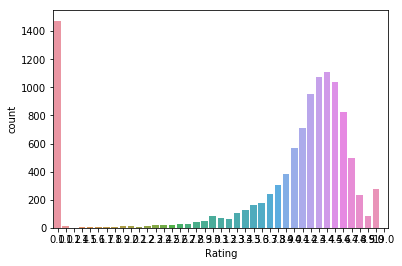

In [179]:
sns.countplot(df['Rating'])


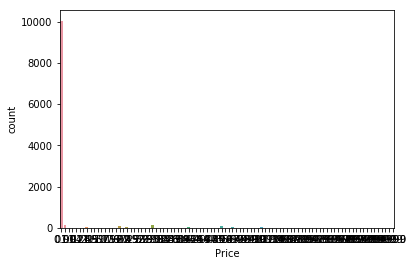

In [180]:
sns.countplot(df['Price'])


## Primary Obseravtion

We can see that, most of the app has rating more than 4. Another observation is that most of the app is free. And paid apps has range $0 - $100. Few of them crosses the limit of $100

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


### A. Super Classs Definition

In [185]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X.reshape((X.shape[0], -1))))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [277]:
# Pocket Algorithm Class for Classification Model
class PocketAlgorithm(Classifier): 
    """ 
        PocketAlgorithm class 
    """
    def __init__(self):
        self.alpha = 0.1
        self.w = np.zeros(2)
        self.maxiter = 10000
        Classifier.__init__(self)
        
    # train Pocket Algorithm model
    def train(self, X, T):

        N = X.shape[0]
        w_ = np.zeros(2)
        X1 = self.add_ones(X)
        for i in range(self.maxiter):
    
            converged = True
            for k in np.random.permutation(N): #range(N):
                y = np.dot(w_,X1[k])
                if np.sign(y) != np.sign(T[k]):
                    w_ += self.alpha * T[k] * X1[k]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(X1, T, w_, self.w) > 0: 
                        self.w[:] = w_[:]

            if converged:
                print("converged at ", i)
                break
    
    # apply the learned model to data X
    def use(self, X):
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        return np.dot(self.w, X1)
        
    # return 1 if w is better -1 if wp is better
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1


### C. QDA

In [189]:
# QDA Class for Classification Model
class PocketAlgorithm(Classifier): 
    """ 
        QDA class 
    """
    def __init__(self):
        Classifier.__init__(self)
        
    # QDA
    def QDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)

    # train QDA model
    def train(self, X, T):
        pass
    
    # apply the learned model to data X
    def use(self, X):
        pass

### D. LDA

In [190]:
# LDA Class for Classification Model
class LDA(Classifier): 
    """ 
        LDA class 
    """
    def __init__(self):
        Classifier.__init__(self)
        
    # train LDA model
    def train(self, X, T):
        pass
    
    # apply the learned model to data X
    def use(self, X):
        pass
    
    def LDA(self, X, mu, sigma, prior):
    sigma_inv = np.linalg.inv(sigma)
    return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)

### E. Logistic Regression

In [191]:
# Logistic Regression Class for Classification Model
class LogisticRegression(Classifier): 
    """ 
        LogisticRegression class 
    """
    def __init__(self):
        self.alpha = 0.1
        self.w = np.random.rand(2)
        Classifier.__init__(self)
        
    # train Logistic Regression model
    def train(self, X, T):
        niter = 1000
        
        w = np.random.rand(X.shape[1], T.shape[])
        X1 = np.hstack((np.ones((N, 1)), Xtrain))
        likeli = []
        for step in range(niter):
            # TODO: add training code here! 
            ys = g(X1, w)
            w += alpha * X1.T @ (Ttrain - ys)

#            ipd.clear_output(wait=True)
#            ipd.display(fig)
#        ipd.clear_output(wait=True)    

        X1t = np.hstack((np.ones((Xtest.shape[0],1)), Xtest))
        Y = self.g(X1t, w)
    
    # apply the learned model to data X
    def use(self, X):
        X1t = np.hstack((np.ones((Xtest.shape[0],1)), Xtest))
        Y = self.g(X1t, w)
        return Y
    
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # for linear fx
    def g(self, X, w):
        return softmax(X @ w) 

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

In [255]:
def partition(X):
    
    train = df.sample(frac = .80)
    test = df.drop(train.index)
    
    return train, test
    

In [269]:
Xtrain, Xtest = partition(df)

In [257]:
Xtrain.__len__()

8673

In [258]:
Xtest.__len__()

2168

In [259]:
Xtrain.describe()

Rating        Price
count  8673.000000  8673.000000
mean      3.624490     1.063652
std       1.521477    16.234917
min       0.000000     0.000000
25%       3.700000     0.000000
50%       4.200000     0.000000
75%       4.500000     0.000000
max      19.000000   400.000000

In [260]:
Xtest.describe()

Rating        Price
count  2168.000000  2168.000000
mean      3.617989     0.881744
std       1.522821    14.752362
min       0.000000     0.000000
25%       3.700000     0.000000
50%       4.200000     0.000000
75%       4.500000     0.000000
max       5.000000   399.990000

In [261]:
Xtrain.head()

App   Category  Rating  \
1894                                       Gardenscapes       GAME     4.6   
6787                               Mediatek SmartDevice      TOOLS     3.6   
8982                                            DW VMAX      TOOLS     3.4   
1570  Horoscopes – Daily Zodiac Horoscope and Astrology  LIFESTYLE     4.6   
508           Free Dating & Flirt Chat - Choice of Love     DATING     4.0   

      Reviews                Size     Installs  Type  Price Content Rating  \
1894  4129665  Varies with device  50,000,000+  Free    0.0       Everyone   
6787    11187                7.3M   1,000,000+  Free    0.0       Everyone   
8982      843                8.5M     100,000+  Free    0.0       Everyone   
1570   161143                 11M  10,000,000+  Free    0.0   Everyone 10+   
508     42194  Varies with device   5,000,000+  Free    0.0     Mature 17+   

         Genres    Last Updated         Current Ver         Android Ver  
1894     Casual   July 13, 2018               2.6.2        4.0.3 and up  
6787      Tools  March 17, 2017              V1.7.6          4.0 and up  
8982      Tools     May 4, 2017               3.7.1          2.2 and up  
1570  Lifestyle   June 25, 2018          5.2.4(881)        4.0.3 and up  
508      Dating   July 24, 2018  Varies with device  Varies with device

In [270]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8673 entries, 10555 to 3755
Data columns (total 13 columns):
App               8673 non-null object
Category          8673 non-null object
Rating            8673 non-null float64
Reviews           8673 non-null object
Size              8673 non-null object
Installs          8673 non-null object
Type              8673 non-null int64
Price             8673 non-null float64
Content Rating    8673 non-null object
Genres            8673 non-null object
Last Updated      8673 non-null object
Current Ver       8673 non-null object
Android Ver       8673 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 948.6+ KB


In [271]:
X = Xtrain.loc[:,'Rating'].values.reshape((-1, 1))
T = Xtrain.loc[:,'Type'].values.reshape((-1, 1))

In [278]:
pocket = PocketAlgorithm()
pocket.train(X,T)
pocket.w

KeyboardInterrupt: 

# Conclusions

It's clear that I did not finish the assignment. Anyway, as per my unserstanding that logistic regression will perform best becasue here Type is the binary. Logistic regression performs best at binary classification.

# References

1. Gupta, L. (2018, Sep 18). Google Play Store Apps. Retrieved January 28, 2019, from https://www.kaggle.com/lava18/google-play-store-apps
2. Lee, M. (2019, Jan 9). Jupyter Notebook Viewer. Retrived February 12, 2019, from https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb
3.  Lee, M. (2019, Jan 9). Jupyter Notebook Viewer. Retrived February 12, 2019, from https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.Sol.ipynb
4. Lee, M. (2019, Jan 9). Jupyter Notebook Viewer. Retrived February 12, 2019, from https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)